# Assignment: Data Wrangling
### `! git clone https://github.com/ds4e/wrangling`
### Do Q1 and Q2, and either Q3 or Q4, for a total of 3 questions.

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the Minnesota police use of for data, `./data/mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Is this a concern? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing? 
3. Dummy variable: For the pretrial data covered in the lecture, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

In [1]:
import numpy as np
import pandas as pd

In [2]:
airbnb_df = pd.read_csv('./data/airbnb_hw.csv')

# previewing the dataset, seeing what columns
# and data types we are working with 
airbnb_df.head(5) 

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


In [25]:
# taking a closer look at the Price column values:
airbnb_df['Price'].unique()

array(['145', '37', '28', '199', '549', '149', '250', '90', '270', '290',
       '170', '59', '49', '68', '285', '75', '100', '150', '700', '125',
       '175', '40', '89', '95', '99', '499', '120', '79', '110', '180',
       '143', '230', '350', '135', '85', '60', '70', '55', '44', '200',
       '165', '115', '74', '84', '129', '50', '185', '80', '190', '140',
       '45', '65', '225', '600', '109', '1,990', '73', '240', '72', '105',
       '155', '160', '42', '132', '117', '295', '280', '159', '107', '69',
       '239', '220', '399', '130', '375', '585', '275', '139', '260',
       '35', '133', '300', '289', '179', '98', '195', '29', '27', '39',
       '249', '192', '142', '169', '1,000', '131', '138', '113', '122',
       '329', '101', '475', '238', '272', '308', '126', '235', '315',
       '248', '128', '56', '207', '450', '215', '210', '385', '445',
       '136', '247', '118', '77', '76', '92', '198', '205', '299', '222',
       '245', '104', '153', '349', '114', '320', '292', '22

In [3]:
# checking if there are any Na and NaN values in the Price column
missing_price = airbnb_df['Price'].isna().sum()
print(f"There are {missing_price} missing values in the price column.")

no_nan_price = airbnb_df['Price'].isnull().sum()
print(f"There are {no_nan_price} NaN values in the price column.")

There are 0 missing values in the price column.
There are 0 NaN values in the price column.


There are no missing values in the price column.

The *Price* column has values which turn into strings once they surpass 999. They have a comma added to it which is causing the dtype to return ' dtype = object ' since Pandas is detecting both numerical and object types. To fix this, I need to remove the ' , ' from all values and make sure they are read as numeric.

In [27]:
# converting the price column to numeric:

# first converting everything to strings, since using 'str.replace' will not work
# on numeric, float, or mixed datatypes, only works with strings
airbnb_df['Price'] = airbnb_df['Price'].astype(str)

# removing ',' and casting price to be numeric 
airbnb_df['Price'] = airbnb_df['Price'].str.replace(',', '')
airbnb_df['Price'] = pd.to_numeric(airbnb_df['Price'], errors = 'coerce') #forcing other values to be na 

# verifying commas have been removed
nan_mask = np.isnan(airbnb_df['Price'])
print(nan_mask.sum())


0


In [28]:
# previewing column once again
airbnb_df['Price'].unique()

array([  145,    37,    28,   199,   549,   149,   250,    90,   270,
         290,   170,    59,    49,    68,   285,    75,   100,   150,
         700,   125,   175,    40,    89,    95,    99,   499,   120,
          79,   110,   180,   143,   230,   350,   135,    85,    60,
          70,    55,    44,   200,   165,   115,    74,    84,   129,
          50,   185,    80,   190,   140,    45,    65,   225,   600,
         109,  1990,    73,   240,    72,   105,   155,   160,    42,
         132,   117,   295,   280,   159,   107,    69,   239,   220,
         399,   130,   375,   585,   275,   139,   260,    35,   133,
         300,   289,   179,    98,   195,    29,    27,    39,   249,
         192,   142,   169,  1000,   131,   138,   113,   122,   329,
         101,   475,   238,   272,   308,   126,   235,   315,   248,
         128,    56,   207,   450,   215,   210,   385,   445,   136,
         247,   118,    77,    76,    92,   198,   205,   299,   222,
         245,   104,

**Q1.2** Categorical variable: For the Minnesota police use of for data, `./data/mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Is this a concern? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing? 

In [29]:
# importing dataset
MN_police_data = pd.read_csv('./data/mn_police_use_of_force.csv')
MN_police_data.head(5)

,response_datetime,problem,is_911_call,primary_offense,subject_injury,force_type,force_type_action,race,sex,age,type_resistance,precinct,neighborhood
0,2016/01/01 00:47:36,Assault in Progress,Yes,DASLT1,NaN,Bodily Force,Body Weight to Pin,Black,Male,20.0,Tensed,1,Downtown East
1,2016/01/01 02:19:34,Fight,No,DISCON,NaN,Chemical Irritant,Personal Mace,Black,Female,27.0,Verbal Non-Compliance,1,Downtown West
2,2016/01/01 02:19:34,Fight,No,DISCON,NaN,Chemical Irritant,Personal Mace,White,Female,23.0,Verbal Non-Compliance,1,Downtown West
3,2016/01/01 02:28:48,Fight,No,PRIORI,NaN,Chemical Irritant,Crowd Control Mace,Black,Male,20.0,Commission of Crime,1,Downtown West
4,2016/01/01 02:28:48,Fight,No,PRIORI,NaN,Chemical Irritant,Crowd Control Mace,Black,Male,20.0,Commission of Crime,1,Downtown West


In [30]:
# cleaning subject_inquiry column: replacing the Na values with 'unknown' as a placeholder
MN_police_data['subject_injury'] = MN_police_data['subject_injury'].fillna('Unknown')
print(MN_police_data['subject_injury'].isna().sum())

# finding the proportion of 'unknown' or missing values within the subject_inquiry column
missing_proportion = MN_police_data['subject_injury'].value_counts(normalize = True)['Unknown']
print(f"The proportion of missing values for the subject_inquiry is {missing_proportion:.2%}")


0
The proportion of missing values for the subject_inquiry is 76.19%


The proportion of missing values is quite high, being about 76% of the column. This raises questions as to why subjects either chose not to respond, or if there was a disparity as to what could be classified as police brutality. The proportion being this high is indicative of further questioning or different forms of data collection, as such a large majority not responding or not being represented is worth looking into.

In [31]:
# cross tabulating 'subject_inquiry' with 'force_type'
cross_tab = pd.crosstab(MN_police_data['subject_injury'], MN_police_data['force_type'])
print(cross_tab)

force_type      Baton  Bodily Force  Chemical Irritant  Firearm  \
subject_injury                                                    
No                  0          1093                131        2   
Unknown             2          7051               1421        0   
Yes                 2          1286                 41        0   

force_type      Gun Point Display  Improvised Weapon  Less Lethal  \
subject_injury                                                      
No                             33                 34            0   
Unknown                        27                 74           87   
Yes                            44                 40            0   

force_type      Less Lethal Projectile  Maximal Restraint Technique  \
subject_injury                                                        
No                                   1                            0   
Unknown                              0                          170   
Yes                               

The crosstable shows that the large majority of 'unknown' values from the dataset came from individuals and their experience with 'Bodily Force' within the 'force_type' column. About 7000 out of the 12000 total observations had a Na or 'unknown' were missing values in line with the 'Bodily Harm' attribute, depicting a large discrepnancy between the two. The pattern could be indicative of either data collection issues or potential biases during the recording process (or both). 

**Q1.3** Dummy variable: For the pretrial data covered in the lecture, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.

In [32]:
url = 'http://www.vcsc.virginia.gov/pretrialdataproject/October%202017%20Cohort_Virginia%20Pretrial%20Data%20Project_Deidentified%20FINAL%20Update_10272021.csv'
df = pd.read_csv(url,low_memory=False) # Pandas downloads and loads the .csv file for you

# checking to see the unique values
print(df['WhetherDefendantWasReleasedPretrial'].unique())

# checking to see how many records contain 9: 9 is an odd value to have here since the rest of the values are binary
# will treat 9 as an outlier and mark it with np.nan
nine_count = (df['WhetherDefendantWasReleasedPretrial'] == 9).sum()
print(f"There are {nine_count} observations of 9")

# replacing outlier value of 9 with np.nan
df['WhetherDefendantWasReleasedPretrial'] = df['WhetherDefendantWasReleasedPretrial'].replace(9, np.nan)

# counting NaN/missing values
missing_pretrial = df['WhetherDefendantWasReleasedPretrial'].isna().sum() # No 'Na' values reported
print(f"There are {missing_pretrial} values missing in 'WhetherDefendantWasReleasedPretrial' column.")

# replacing any Na or NaN values with np.nan to ensure they're marked
df['WhetherDefendantWasReleasedPretrial'] = df['WhetherDefendantWasReleasedPretrial'].replace(to_replace=[None, '', '?'], value = np.nan)
print(df['WhetherDefendantWasReleasedPretrial'].head(10))

# verifying 9 was marked with np.nan
unique_values = df['WhetherDefendantWasReleasedPretrial'].unique()
print(f"Unique values: {unique_values}")

# previewing the cleaned column
df['WhetherDefendantWasReleasedPretrial'].head(10)

[9 0 1]
There are 31 observations of 9
There are 31 values missing in 'WhetherDefendantWasReleasedPretrial' column.
0    NaN
1    0.0
2    0.0
3    0.0
4    1.0
5    0.0
6    1.0
7    1.0
8    0.0
9    1.0
Name: WhetherDefendantWasReleasedPretrial, dtype: float64
Unique values: [nan  0.  1.]


0    NaN
1    0.0
2    0.0
3    0.0
4    1.0
5    0.0
6    1.0
7    1.0
8    0.0
9    1.0
Name: WhetherDefendantWasReleasedPretrial, dtype: float64

**Q1.4** Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

In [33]:
# checking data type:
data_type = df['ImposedSentenceAllChargeInContactEvent'].dtype
print(data_type)

#looking at other values through .unique()
unique_contact = df['ImposedSentenceAllChargeInContactEvent'].unique()
# print(unique_contact)

# since dtype returned 'object', we have a mix of strings and integers.
# using str.strip() to remove blank spaces
# replacing the empty spaces with NaN using np.nan
df['ImposedSentenceAllChargeInContactEvent'] = df['ImposedSentenceAllChargeInContactEvent'].str.strip()
df['ImposedSentenceAllChargeInContactEvent'] = df['ImposedSentenceAllChargeInContactEvent'].replace(to_replace = [None, '', '?'], value = np.nan)

# counting missing values
missing_contact = df['ImposedSentenceAllChargeInContactEvent'].isna().sum()
print(f"There are {missing_contact} NaN values.")

# checking to see if NaN replacement worked
df['ImposedSentenceAllChargeInContactEvent'].head(5)

object
There are 9053 NaN values.


0                 NaN
1                  60
2                  12
3    .985626283367556
4                 NaN
Name: ImposedSentenceAllChargeInContactEvent, dtype: object

**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks.

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work.
2. Drop any columns that do not contain data.
3. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
4. Clean the Age variable and make a histogram of the ages of the victims.
5. What proportion of victims are male?
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Are sharks more likely to launch unprovoked attacks on men or women? Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Is it more or less likely to be fatal when the victim is male or female? How do you feel about sharks?
9. What proportion of attacks appear to be by white sharks? (Hint: `str.split()` makes a vector of text values into a list of lists, split by spaces.)

In [34]:
# importing dataset:
import matplotlib.pyplot as plt

shark_data = './data/GSAf5.xls'
df_sharks = pd.read_excel(shark_data)

df_sharks.head(5)
df_sharks.columns

Index(['Date', 'Year', 'Type', 'Country', 'State', 'Location', 'Activity',
       'Name', 'Sex', 'Age', 'Injury', 'Fatal Y/N', 'Time', 'Species ',
       'Source', 'pdf', 'href formula', 'href', 'Case Number', 'Case Number.1',
       'original order', 'Unnamed: 21', 'Unnamed: 22'],
      dtype='object')

In [35]:
# 2. Dropping all columns that contain empty values:
#   - using the .dropna method to remomve columns which only contain NaN values

df_sharks.dropna(axis = 1, how = 'all', inplace = True)
df_sharks.head(5)

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,2025-01-23 00:00:00,2025.0,Unprovoked,Australia,Western Australia,Shipwreck Cove,Bathing,Boy,M,12,...,Not stated,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2025-01-22 00:00:00,2025.0,Unprovoked,Australia,Western Australia,Cheynes beach,Surfing,Dale Kittow,M,37,...,Bronze whaler,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2025-01-11 00:00:00,2025.0,Provoked,USA,Hawaii,Off Haleiwa Boat Harbour Oahu,Diving,Male not stated was a dive tour worker,M,23,...,Not stated,Kevin McMurray Trackingsharks.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2025-01-02 00:00:00,2025.0,Unprovoked,New Caledonia,Grande Terre,Islet of Kendek near Koumac,Spearfishing,Robert Cuewapuru,M,40,...,Reportedly Tiger or Bull shark,Johannes Marchand Todd Smith,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2025-01-02 00:00:00,2025.0,Unprovoked,Australia,South Australia,Granites Beach near Westall Streaky Bay,Surfing,Lance Appleby,M,28,...,Great White Shart estimated 4.8m 16 ft,Glen Folkard: Simon De Marchi News.com.au: The...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
# 3. Clean the year variable. Describe the range of values you see. 
# Filter the rows to focus on attacks since 1940.
#   Are the attacks increasing, decreasing, or remaining constant
#   over time?


# converting all values to numeric, those that aren't will be NaN
df_sharks['Year'] = pd.to_numeric(df_sharks['Year'], errors = 'coerce')
print(f"There are {df_sharks['Year'].isna().sum()} values missing from the column 'Year'.")
range_of_year = df_sharks['Year'].describe

# looking at attacks from 1940 and onwards
attacks_since_1940 = df_sharks[df_sharks['Year'] >= 1940]
trend_since_1940 = attacks_since_1940.describe()
print(f"Trend: {trend_since_1940}")

# looking at the trend
attacks_per_year = attacks_since_1940['Year'].value_counts().sort_index()
attacks_per_year.head(5)



There are 2 values missing from the column 'Year'.
Trend:               Year  original order
count  5458.000000     5268.000000
mean   1991.937156     4165.775626
std      24.083712     1521.433279
min    1940.000000     1531.000000
25%    1969.000000     2848.750000
50%    2000.000000     4165.500000
75%    2013.000000     5482.250000
max    2026.000000     6802.000000


Year
1940.0    24
1941.0    27
1942.0    41
1943.0    28
1944.0    31
Name: count, dtype: int64

There are 3131 number of missing values in the 'Age' column.


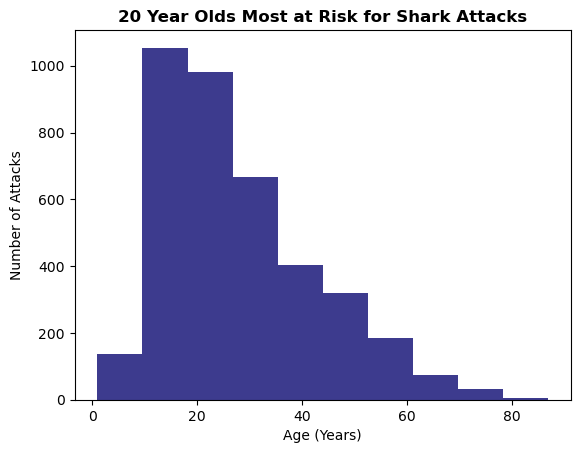

In [37]:
# 4. Clean the Age variable and make a histogram of the ages of the victims

# cleaning Age column: converting to numeric type and summing missing values
df_sharks['Age'] = pd.to_numeric(df_sharks['Age'], errors = 'coerce')
age_missing_sharks = df_sharks['Age'].isna().sum()
print(f"There are {age_missing_sharks} number of missing values in the 'Age' column.")

# dropping na values so we can plot:
ages_plot = df_sharks['Age'].dropna()

# plotting histogram:
plt.hist(ages_plot, bins = 10, color = '#3D3B8E')
plt.xlabel(xlabel = "Age (Years)")
plt.ylabel(ylabel = "Number of Attacks")
plt.title("20 Year Olds Most at Risk for Shark Attacks", weight = 'bold')
plt.show()

In [39]:
# 5. What proportion of victims are male?
male_proportion = df_sharks['Sex'].value_counts(normalize = True).get('M', 0)
print(f"Male Proportion: {male_proportion}")

Male Proportion: 0.8752533915484173


In [48]:
# 6. Clean the 'Type' variable so it only takes three values:
# provoked, unprovoked, and unknown. What proportion of attacks are unprovoked?

# looking at current possible values
df_sharks['Type'].unique()

# creating mapping to allocate the other columns to 'unknown'
type_mapping = {
    'Provoked': 'Provoked',
    ' Provoked': 'Provoked',
    'Unprovoked': 'Unprovoked',
    'Questionable':  'Unknown',
    'Watercraft': 'Unknown',
    'Sea Disaster': 'Unknown',
    np.nan: 'Unknown',
    '?': 'Unknown', 
    'Unconfirmed': 'Unknown', 
    'Unverified': 'Unknown', 
    'Invalid': 'Unknown', 
    'Under investigation': 'Unknown',
    'Boat': 'Unknown', 
}

# applying the mapping to a new var that will store the data
only_3_Type = df_sharks['Type'].map(type_mapping).fillna("Unknown")

# finding proportion of unprovoked attacks
unprovoked_attacks_proportion = only_3_Type.value_counts(normalize = True).get('Unprovoked', 0)

# verifying 3 outputs are correct and printing out the proportion:
print(f"Proportion of Unprovoked Attacks: {unprovoked_attacks_proportion}")
print(f"{only_3_Type.unique()}")

Proportion of Unprovoked Attacks: 0.7369851258581236
['Unprovoked' 'Provoked' 'Unknown']


In [51]:
# 7. Clean the 'Fatal Y/N' variable so it only takes three values: Y, N, and Unknown.
df_sharks['Fatal Y/N'].unique()
fatal_mapping = {
    'N': 'N',
    'Y': 'Y', 
    'UNKNOWN': 'Unknown', 
    'F': 'Unknown',
    'M': 'Unknown',
    np.nan: 'Unknown',
    'n': 'N',
    'Nq': 'Unknown',
    '2017': 'Unknown',
    'Y x 2': 'Unknown',
    ' N': 'N', 
    'N ': 'N',
    'y': 'Y',
}

only_3_fatal = df_sharks['Fatal Y/N'].map(fatal_mapping).fillna("Unknown")
print(only_3_fatal.unique())

['N' 'Y' 'Unknown']


In [58]:
# 8. Are sharks more likely to launch unprovoked attacks on men or women?
Unprovoked_Attacks = df_sharks[df_sharks['Type'] == 'Unprovoked']

# filtering out the unprovoked_attacks for each sex:
male_unprovoked_proportion = Unprovoked_Attacks['Sex'].value_counts(normalize = True).get('M', 0)
female_unprovoked_proportion = Unprovoked_Attacks['Sex'].value_counts(normalize = True).get('F', 0)

# printing out results
print(f"The proportion of unprovoked shark attacks targetting males: {male_unprovoked_proportion}")
print(f"The proportion of unprovoked shark attacks targetting females: {female_unprovoked_proportion}")

The proportion of unprovoked shark attacks targetting males: 0.8647943831494483
The proportion of unprovoked shark attacks targetting females: 0.13440320962888666


Based on the results, it appears that males are more likely to be involved in an unprovoked shark attack. The proportion of males involved in in unprovoked shark attacks is about 0.86 while females make up about 0.14 of the remaining attacks.

In [67]:
# 9. What proportion of attacks appear to be by white sharks?

# Determine the proportion of attacks by white sharks
df_sharks['Species '] = df_sharks['Species '].str.lower()

# filtering for records with any indication of 'white shark' within the records:
white_shark_attacks = df_sharks[df_sharks['Species '].str.contains('white shark', na=False)]
proportion_white_shark = len(white_shark_attacks) / len(df)

print(f"Proportion of attacks by white sharks: {proportion_white_shark}")

Proportion of attacks by white sharks: 0.16671017140868355


**Q3.** Open the "tidy_data.pdf" document in the repo, which is a paper called Tidy Data by Hadley Wickham.

  1. **Read the abstract. What is this paper about?** \
   The paper is about learning and understanding the idea behind *data tyding*. Prepping data for cleaning by ensuring that each observation is its own row and that each column is its own variable. The abstract mentions how keeping data structures organized and clean can help assist with manipulation and comparison when utilizing the data since we end up using a smaller set of tools.
  2. **Read the introduction. What is the "tidy data standard" intended to accomplish?** \
   Data tyding helps limit/reduce the amount of operations we have to use when operating on data. It's intended to help eliminate the need to reinstate a new plan for organizing the data, it can be used over and over again for datasets. It aims to help simplify the work and energy spent between translating the data between one tool to another, therefore allowing us to focus on the main part without having to pay much attention to the other logistics that come with the data.
  3. **Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way."** \
   Each dataset may have its own problems - missing data, errors in labeling, etc. For each dataset, we have to sort through and understand what may need mending before using it to run analysis/computations. Once tidy, the datasets are more similar now in terms of their structure and foundation. In terms of family, they may look more traditional now: tidy datasets are similar in their structural makeup which allows us to easily run computations and compare. \
  **3a.** **What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."**
   Looking at a dataset, we may be able to pinpoint that rows are observations and that columns are variables. However, when looking at specific datasets we have to be wary of which factors would provide us a clear representation of what we are comparing and what patterns we are attempting to uncover/represent. We must consider the dataset with its original context as well as the context behind what we hope to show with the data.
  4. **Read Section 2.2. How does Wickham define values, variables, and observations?**
   Values are either numbers (if the dataset is quantitative), or strings (if the dataset is qualitative). Each value is part of a variable and an observation. A variable looks into the common attribute lying underneath multiple observations, while observations take into account all values for that specific unit.
  5. **How is "Tidy Data" defined in section 2.3?**
   Tidy Data is considered as the standard or foundational structure for datasets. Data can be considered tidy if each variable forms a column, if each observation forms a row, and each type of observational unit forms a table.
  6. **Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?**
   The five most common problems with messy datasets are: 
   -  The column headers start with values and not the variable name
   -  There are multiple variables stored in one column
   -  Variables are stored in both rows and columns
   -  Multiple types of observational unites are stored in the same table
   -  A single observational unit is stored in multiple tables 
   \
   Melting is when we turn columns into rows, or essentially are lengthening or widening datasets. 
  7. **Why, specifically, is table 11 messy but table 12 tidy and "molten"?**
   Table 11 is messy because each column is representative of a new day, when it should be reversed. Additionally the 'element' column contains two variables within it: tmax and tmin. Separating those into two separate columns and replacing the values with it then results in each variable being its own distinct column with its respective value in an easy to read fashion which is exactly what table 12 does.
  8. **Read Section 6. What is the "chicken-and-egg" problem with focusing on tidy data? What does Wickham hope happens in the future with further work on the subject of data wrangling?**
   Tidy data is bound by the same tools we use to make/clean it. The data and its respective formation are interrelated, which makes it difficult to break out of its mold. Wickham hopes for others to be able to continue developing and innovate new methods of storage strategies. He also hopes for new methodologies from fields regarding data collection and analysis to improve and allow us to design more appropriate tools.

**Q4.** Many important datasets contain a race variable, typically limited to a handful of values often including Black, White, Asian, Latino, and Indigenous. This question looks at data gathering efforts on this variable by the U.S. Federal government.

1. How did the most recent US Census gather data on race?
2. Why do we gather these data? What role do these kinds of data play in politics and society? Why does data quality matter?
3. Please provide a constructive criticism of how the Census was conducted: What was done well? What do you think was missing? How should future large scale surveys be adjusted to best reflect the diversity of the population? Could some of the Census' good practices be adopted more widely to gather richer and more useful data?
4. How did the Census gather data on sex and gender? Please provide a similar constructive criticism of their practices.
5. When it comes to cleaning data, what concerns do you have about protected characteristics like sex, gender, sexual identity, or race? What challenges can you imagine arising when there are missing values? What good or bad practices might people adopt, and why?
6. Suppose someone invented an algorithm to impute values for protected characteristics like race, gender, sex, or sexuality. What kinds of concerns would you have?